<a href="https://colab.research.google.com/github/wusinyee/SYW-Portfolio-v2023/blob/main/Manifest_EDA_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Manifest Overview 04/08/2023**


Step 0: Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### `Step 1: Load and transform the dataset into a pandas DataFrame`

In [14]:
data = pd.read_csv('/content/Sample_TTINTDATA/ManifestOverviewExtract230804ds.csv')
# Check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3573 entries, 0 to 3572
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Manifest number  3573 non-null   object 
 1   Product          3573 non-null   object 
 2   Type             3573 non-null   object 
 3   Client           3573 non-null   object 
 4   Agent            1314 non-null   object 
 5   Status           3573 non-null   object 
 6   Scanned          3573 non-null   int64  
 7   HAWB             1392 non-null   object 
 8   MAWB             3573 non-null   object 
 9   Total Kg         3573 non-null   float64
 10  Total Items      3573 non-null   int64  
 11  Valid count      3573 non-null   int64  
 12  Total mailbags   3154 non-null   float64
 13  Valid mailbags   3154 non-null   float64
 14  PoA              3573 non-null   int64  
 15  Uploaded         3573 non-null   object 
 16  Accepted         1889 non-null   object 
 17  Started       

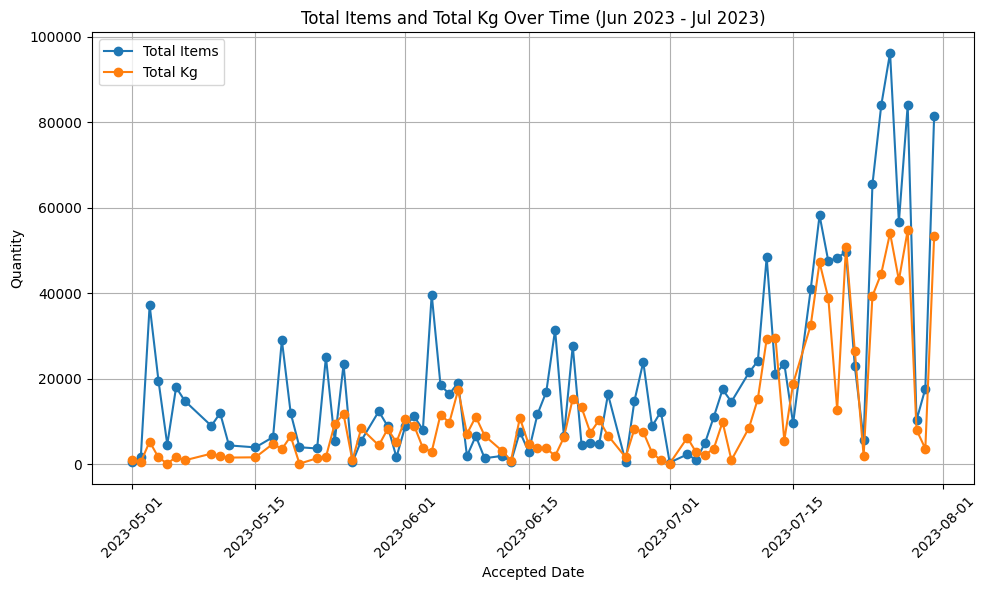

In [46]:
# Handling Missing Values
# You can choose to drop columns with a high percentage of missing values or impute/fill them.
# Let's say you want to drop columns with more than 50% missing and fill others with 0.
threshold = 0.5  # Define the threshold for dropping columns
data.dropna(thresh=len(data) * threshold, axis=1, inplace=True)  # Drop columns with > threshold missing

# For columns with few missing values, you can fill with 0 or the mean/median.
data.fillna(0, inplace=True)  # Fill remaining missing values with 0

# Convert the 'Accepted' column to datetime
data['Accepted'] = pd.to_datetime(data['Accepted'], dayfirst=True)

# Group by the 'Accepted' column containing date information
data_aggregated = data.groupby('Accepted').agg({'Total Items': 'sum', 'Total Kg': 'sum'}).reset_index()

# Filter data for the desired time range
start_date = pd.to_datetime('2023-05-01')
end_date = pd.to_datetime('2023-07-31')
filtered_data = data_aggregated[(data_aggregated['Accepted'] >= start_date) & (data_aggregated['Accepted'] <= end_date)]

# Data Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Accepted'], filtered_data['Total Items'], marker='o', label='Total Items')
plt.plot(filtered_data['Accepted'], filtered_data['Total Kg'], marker='o', label='Total Kg')
plt.xlabel('Accepted Date')
plt.ylabel('Quantity')
plt.title('Total Items and Total Kg Over Time (Jun 2023 - Jul 2023)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 2: Get a Big Picture

In [15]:
print(data.head())
print(data.describe())

             Manifest number Product           Type Client Agent Status  \
0               SHI-20230803   PNPDZ        Tracked    SHI   NaN    new   
1  EBY-20230803-176-83197295     IMP  NonTrackedBag    EBY   NaN    new   
2  EBY-20230803-176-83197295     IMX     TrackedBag    EBY   NaN    new   
3  EBY-20230803-172-61543425     IMP  NonTrackedBag    EBY   NaN    new   
4  EBY-20230803-172-61543425     IMX     TrackedBag    EBY   NaN    new   

   Scanned HAWB          MAWB   Total Kg  Total Items  Valid count  \
0        0  NaN             -  32379.281        29880        29880   
1        0  NaN  176-83197295     90.336          941          941   
2        0  NaN  176-83197295     39.920          175          175   
3        0  NaN  172-61543425     82.495          987          987   
4        0  NaN  172-61543425    205.142         1049         1049   

   Total mailbags  Valid mailbags  PoA    Uploaded Accepted Started Ended  CMR  
0             NaN             NaN    0  04-08-2

### Step 4: Data Preparation

In [16]:
# Rename columns if needed
data.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)

### Step 5: Know the Variables

In [30]:
# Check the column names in your dataset
print(data.columns)

# Specify the numerical columns you want to include in the histogram
numerical_columns = ['Total Kg', 'Total Items', 'Accepted']

Index(['Manifest number', 'Product', 'Type', 'Client', 'Agent', 'Status',
       'Scanned', 'HAWB', 'MAWB', 'Total Kg', 'Total Items', 'Valid count',
       'Total mailbags', 'Valid mailbags', 'PoA', 'Uploaded', 'Accepted',
       'Started', 'Ended', 'CMR'],
      dtype='object')


 Step 5: Examine Relationships Between Variables and identify Key *Clients*



Client
SNT    2827346
SHI     936781
JOM     157970
Name: Total Items, dtype: int64


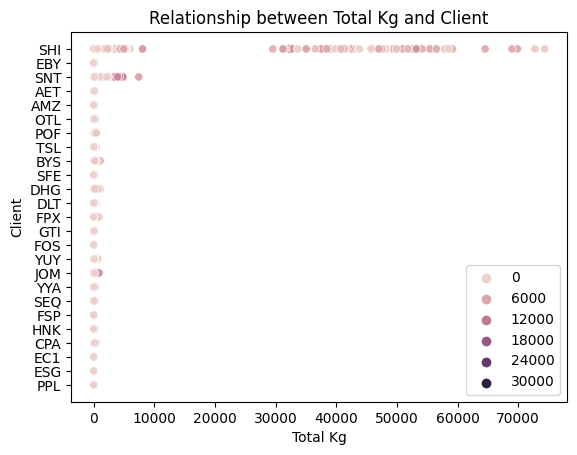

In [45]:
import seaborn as sns

#identify Key Clients
N = 3
top_customers = data.groupby('Client')['Total Items'].sum().sort_values(ascending=False).head(N)
print(top_customers)

# Assuming 'Total Kg', 'Total Items', and 'key_customer' are the correct column names
sns.scatterplot(data=data, x='Total Kg', y='Client', hue='Total Items')
plt.xlabel('Total Kg')
plt.ylabel('Client')
plt.title('Relationship between Total Kg and Client')
plt.legend()
plt.show()
